In [42]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jar = pd.read_csv('data.csv')

In [3]:
jar

,FaceCovMax,rResolBulk,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,StickProb,rResolGBB,fuel_swelling,fuel_gas_swelling
0,0.650872,3.281529e-09,5.696813e-18,9720.560229,2.415274e-09,5.458748e-31,1.250136e-07,6.908243e-07,117.792586,85.720906
1,0.700489,3.405615e-09,2.270948e-18,10617.119460,3.584054e-10,5.298310e-31,1.674882e-07,9.826777e-07,114.562824,82.491144
2,0.770661,3.548509e-09,1.371849e-18,25422.010780,1.667374e-10,3.316310e-31,3.433259e-07,3.038373e-06,107.520973,75.449293
3,0.683931,3.364810e-09,1.777367e-18,8486.594548,1.579265e-10,1.698032e-30,1.423811e-07,8.312587e-07,40910.698040,40878.626360
4,0.704481,2.530986e-09,3.591396e-18,19902.464330,8.047679e-10,2.323996e-31,3.178563e-07,4.354383e-07,113.730578,81.658898
...,...,...,...,...,...,...,...,...,...,...
395,0.722900,2.798555e-09,2.656561e-18,19130.359460,1.053442e-09,1.895258e-31,1.830481e-07,6.757461e-07,111.721056,79.649376
396,0.518879,3.031245e-09,3.034036e-18,26596.850310,4.910994e-10,1.916529e-31,2.122171e-07,1.330476e-06,135.356457,103.284777
397,0.620248,3.066550e-09,6.118671e-18,35262.843210,1.243444e-10,6.898974e-31,2.140948e-07,4.455297e-07,124.703100,92.631420
398,0.782661,4.830637e-09,2.774393e-18,91077.427930,4.798498e-10,4.163919e-31,3.265316e-07,1.590228e-06,106.523136,74.451455


In [4]:
jar.drop('fuel_swelling', axis=1, inplace=True)

<Axes: >

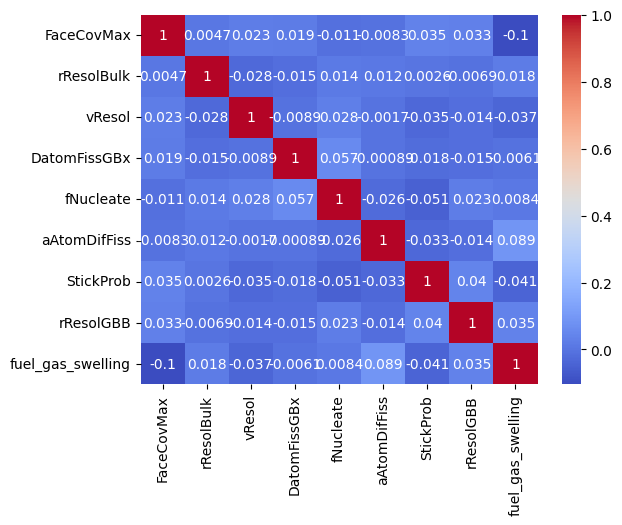

In [5]:
correl = jar.corr()
sns.heatmap(correl, annot=True, cmap='coolwarm')

In [6]:
jar

,FaceCovMax,rResolBulk,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,StickProb,rResolGBB,fuel_gas_swelling
0,0.650872,3.281529e-09,5.696813e-18,9720.560229,2.415274e-09,5.458748e-31,1.250136e-07,6.908243e-07,85.720906
1,0.700489,3.405615e-09,2.270948e-18,10617.119460,3.584054e-10,5.298310e-31,1.674882e-07,9.826777e-07,82.491144
2,0.770661,3.548509e-09,1.371849e-18,25422.010780,1.667374e-10,3.316310e-31,3.433259e-07,3.038373e-06,75.449293
3,0.683931,3.364810e-09,1.777367e-18,8486.594548,1.579265e-10,1.698032e-30,1.423811e-07,8.312587e-07,40878.626360
4,0.704481,2.530986e-09,3.591396e-18,19902.464330,8.047679e-10,2.323996e-31,3.178563e-07,4.354383e-07,81.658898
...,...,...,...,...,...,...,...,...,...
395,0.722900,2.798555e-09,2.656561e-18,19130.359460,1.053442e-09,1.895258e-31,1.830481e-07,6.757461e-07,79.649376
396,0.518879,3.031245e-09,3.034036e-18,26596.850310,4.910994e-10,1.916529e-31,2.122171e-07,1.330476e-06,103.284777
397,0.620248,3.066550e-09,6.118671e-18,35262.843210,1.243444e-10,6.898974e-31,2.140948e-07,4.455297e-07,92.631420
398,0.782661,4.830637e-09,2.774393e-18,91077.427930,4.798498e-10,4.163919e-31,3.265316e-07,1.590228e-06,74.451455


In [7]:
jar = jar[jar['fuel_gas_swelling'] <= 100]

In [8]:
jar.describe()

,FaceCovMax,rResolBulk,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,StickProb,rResolGBB,fuel_gas_swelling
count,290.000000,2.900000e+02,2.900000e+02,290.000000,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,290.000000
mean,0.715402,3.110398e-09,3.237976e-18,40057.653675,8.684337e-10,5.812815e-31,3.015329e-07,6.571685e-07,81.728331
std,0.063369,6.504987e-10,2.582581e-18,36182.316876,8.031759e-10,4.812942e-31,2.696870e-07,5.879149e-07,6.668376
min,0.556157,1.004866e-09,4.249310e-19,2264.543933,7.061696e-11,4.357208e-32,2.709485e-08,2.990960e-08,63.573482
25%,0.670892,2.679958e-09,1.650381e-18,17387.375635,3.934979e-10,2.679012e-31,1.282222e-07,2.917173e-07,76.584278
50%,0.712025,3.117921e-09,2.504411e-18,28782.797180,6.438268e-10,4.429886e-31,2.248092e-07,4.908304e-07,81.725056
75%,0.759630,3.543446e-09,3.948482e-18,50238.512105,1.081593e-09,7.410945e-31,3.808559e-07,8.257272e-07,86.251225
max,0.895446,4.875207e-09,2.170678e-17,267222.066500,8.341022e-09,3.938210e-30,2.402725e-06,4.446903e-06,98.772631


<Axes: >

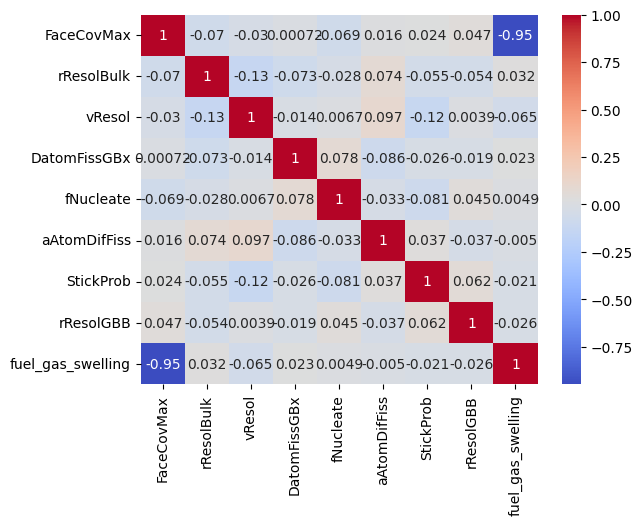

In [9]:
correl = jar.corr()
sns.heatmap(correl, annot=True, cmap='coolwarm')

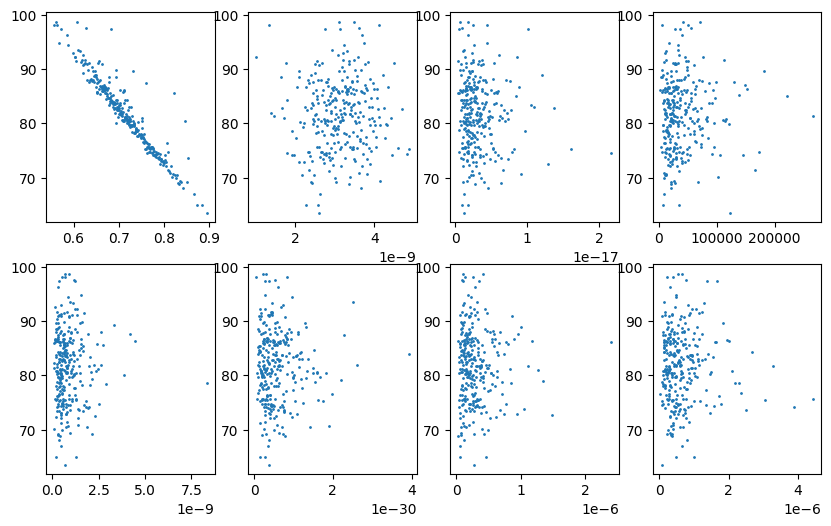

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(jar.iloc[:,i], jar.iloc[:,8], s=1)
    
plt.show()

# Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
feature_indices = list(range(8))

In [13]:
features = jar.iloc[:, feature_indices]

In [14]:
features

,FaceCovMax,rResolBulk,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,StickProb,rResolGBB
0,0.650872,3.281529e-09,5.696813e-18,9720.560229,2.415274e-09,5.458748e-31,1.250136e-07,6.908243e-07
1,0.700489,3.405615e-09,2.270948e-18,10617.119460,3.584054e-10,5.298310e-31,1.674882e-07,9.826777e-07
2,0.770661,3.548509e-09,1.371849e-18,25422.010780,1.667374e-10,3.316310e-31,3.433259e-07,3.038373e-06
4,0.704481,2.530986e-09,3.591396e-18,19902.464330,8.047679e-10,2.323996e-31,3.178563e-07,4.354383e-07
5,0.866433,2.614630e-09,1.295106e-18,9409.333710,4.883834e-10,3.546486e-31,5.975684e-08,6.426013e-07
...,...,...,...,...,...,...,...,...
391,0.764632,2.558002e-09,1.349131e-18,4273.639687,1.258036e-09,2.874737e-31,1.197161e-07,6.933030e-07
394,0.662000,3.351414e-09,7.784369e-19,29771.793960,8.707109e-10,3.772896e-31,1.974038e-07,2.815382e-07
395,0.722900,2.798555e-09,2.656561e-18,19130.359460,1.053442e-09,1.895258e-31,1.830481e-07,6.757461e-07
397,0.620248,3.066550e-09,6.118671e-18,35262.843210,1.243444e-10,6.898974e-31,2.140948e-07,4.455297e-07


In [15]:
x_scaler = StandardScaler()
X = x_scaler.fit_transform(features)

In [16]:
X

array([[-1.02009387,  0.26353043,  0.95373073, ..., -0.07369275,
        -0.6556652 ,  0.057345  ],
       [-0.23574651,  0.45461517, -0.37508948, ..., -0.1070851 ,
        -0.49789708,  0.55462435],
       [ 0.87351965,  0.67466474, -0.72383119, ..., -0.5196033 ,
         0.15523643,  4.05725459],
       ...,
       [ 0.11852919, -0.48021921, -0.22551851, ..., -0.81537011,
        -0.44010117,  0.03165373],
       [-1.50419018, -0.06752411,  1.11736081, ...,  0.22606476,
        -0.32478124, -0.3606043 ],
       [ 1.06322318,  2.64906415, -0.17981412, ..., -0.34318859,
         0.09285531,  1.58980859]])

In [48]:
y = jar[['fuel_gas_swelling']]

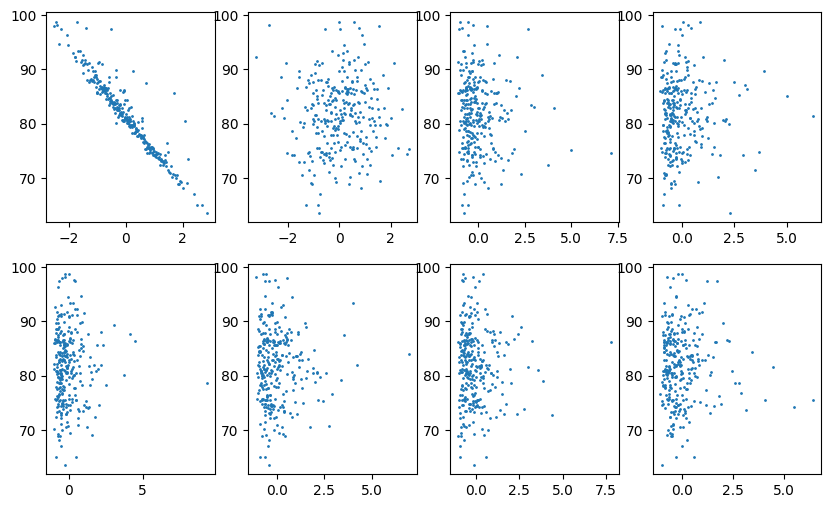

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X[:,i], y, s=1)
    
plt.show()

# SVR

In [51]:
from sklearn.svm import SVR

In [61]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X, y)

/home/atom/research/wd-swelling/.swel/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

In [62]:
rng = np.random.RandomState(0)
X_test = rng.randn(290, 8)

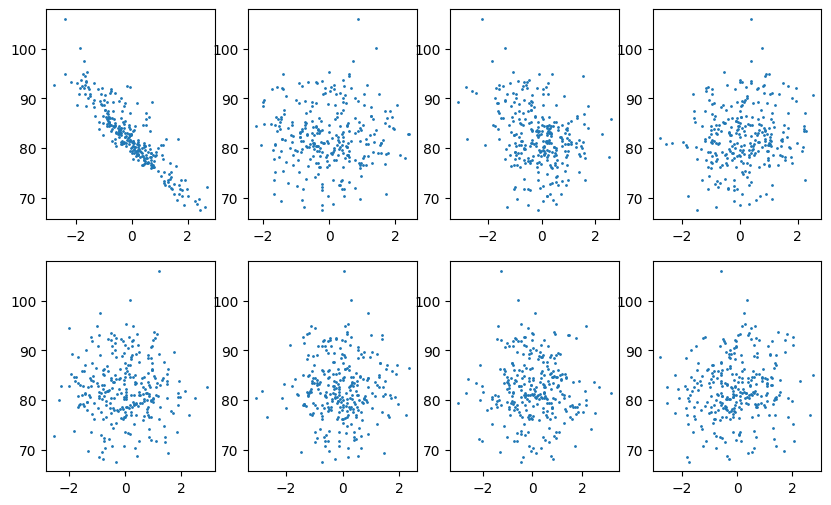

In [63]:
y_pred = svr_rbf.predict(X_test)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X_test[:,i], y_pred, s=1)
    
plt.show()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y.ravel())

RandomForestRegressor(max_depth=2, random_state=0)

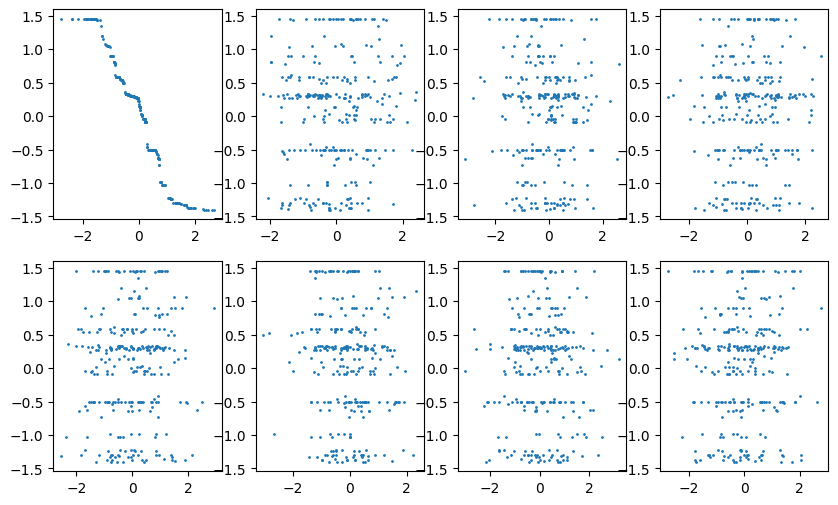

In [30]:
y_pred = regr.predict(X_test)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X_test[:,i], y_pred, s=1)
    
plt.show()

# GP

In [80]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [81]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpreg = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [83]:
gpreg.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

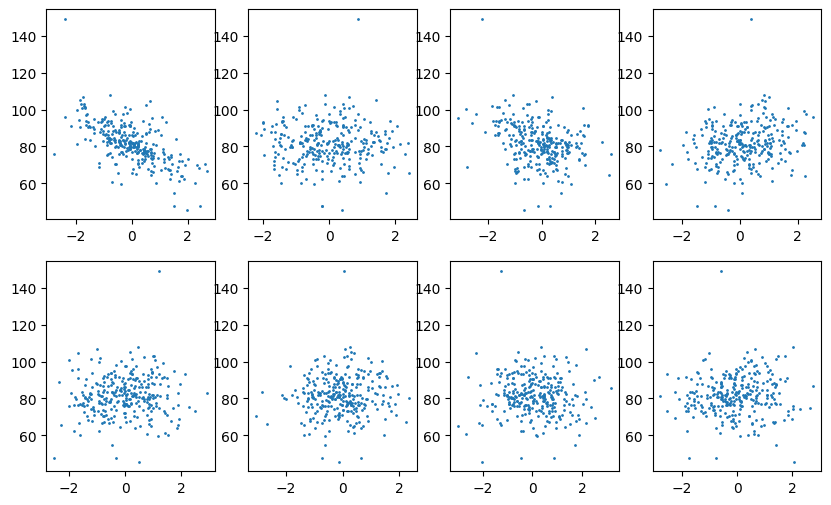

In [84]:
y_pred = gpreg.predict(X_test)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X_test[:,i], y_pred, s=1)
    
plt.show()

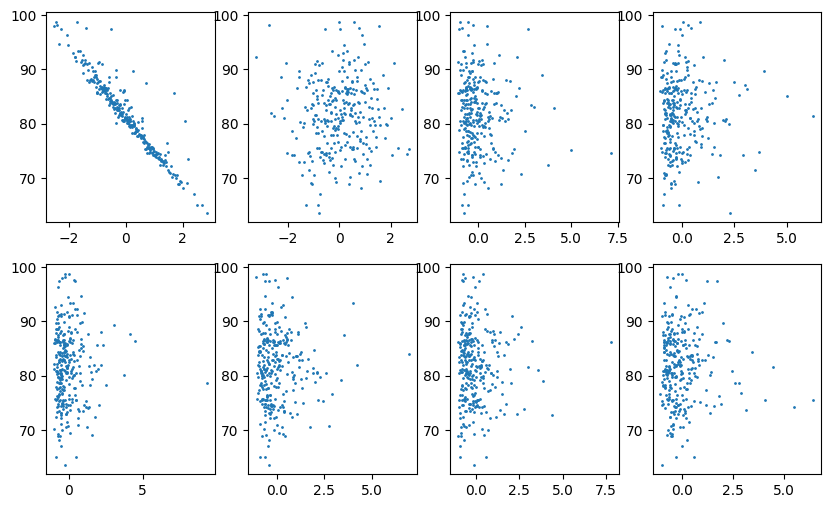

In [85]:
y_pred = gpreg.predict(X)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X[:,i], y_pred, s=1)
    
plt.show()

# NN

In [64]:
from sklearn.neural_network import MLPRegressor

In [67]:
nnregr = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', random_state=1, max_iter=500)
nnregr.fit(X, y)

/home/atom/research/wd-swelling/.swel/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/atom/research/wd-swelling/.swel/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', max_iter=500, random_state=1)

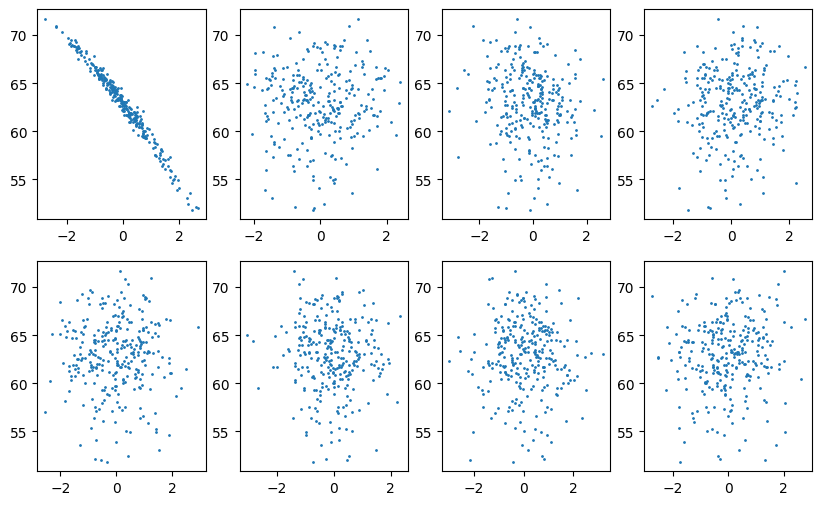

In [68]:
y_pred = nnregr.predict(X_test)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X_test[:,i], y_pred, s=1)
    
plt.show()

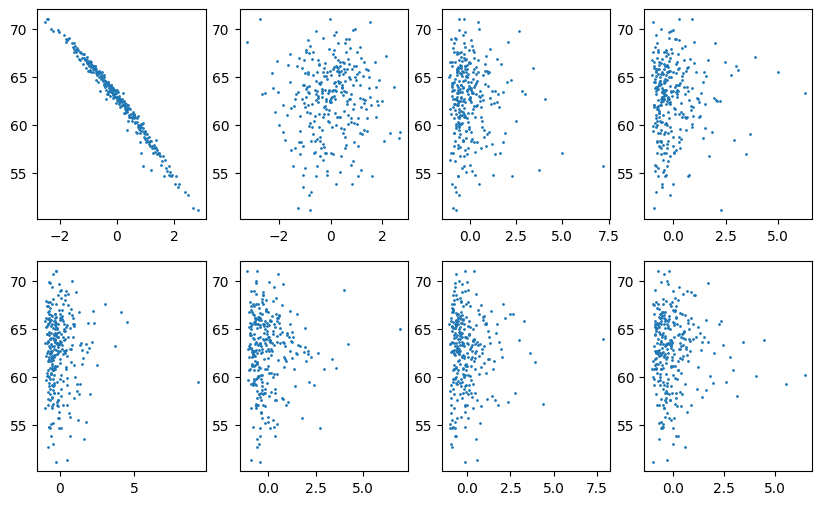

In [69]:
y_pred = nnregr.predict(X)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X[:,i], y_pred, s=1)
    
plt.show()

# MCMC

In [70]:
def target_dist(x):
    mu = 70
    sig = 5
    return np.exp(-0.5 * ((x-mu)/sig)**2)

def candidate_dist(x, sig=0.5):
    return np.random.normal(x, sig)
    
def mod_mcmc_sampler(num_param, num_samples, initial_state, proposal_sigma, model):
    samples = [initial_state]

    for ii in range(num_samples):
        current_state = samples[-1]
        
        for jj in range(num_param):
            current_p = current_state[jj]
            proposed_p = 10
            while (abs(proposed_p) > 2):
                proposed_p = candidate_dist(current_p, proposal_sigma)

            proposed_state = copy.deepcopy(current_state)
            proposed_state[jj] = proposed_p
            theta1 = model.predict([[*current_state]])[0]
            theta2 = model.predict([[*proposed_state]])[0]

            #acceptance_ratio = target_dist(proposed_state) / target_dist(current_state)
            acceptance_ratio = target_dist(theta2) / target_dist(theta1)

            if np.random.rand() < acceptance_ratio:
                current_state = proposed_state

        samples.append(current_state)

    return np.array(samples)

In [77]:
nnsamples = mod_mcmc_sampler(8, 1000, np.zeros(8), 0.1, nnregr)

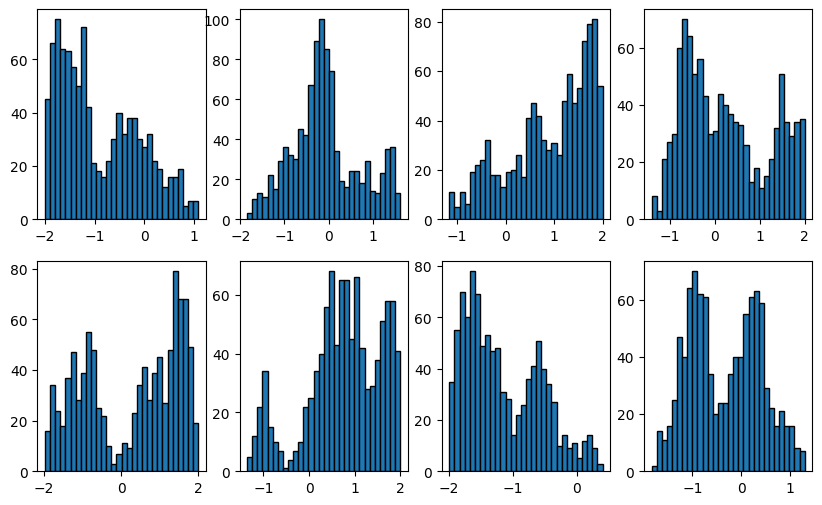

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()):
    ax.hist(nnsamples[:,i], bins=30, ec='k')
    
plt.show()

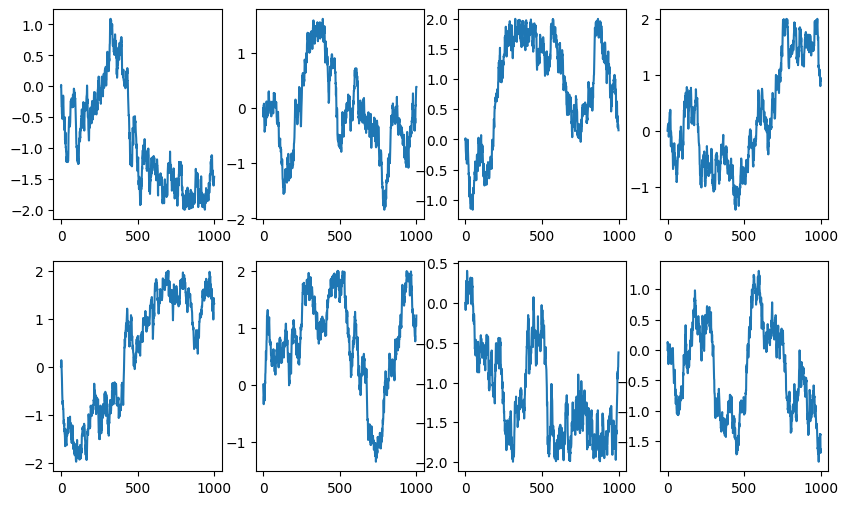

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()):
    ax.plot(nnsamples[:,i])
    
plt.show()